### Time Series Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
from vega_datasets import data

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
df = data.sf_temps()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df = df.set_index('date')

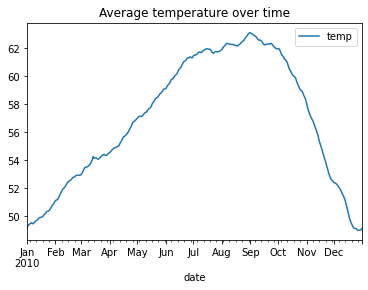

In [8]:
df.resample('D').mean().plot(title = 'Average temperature over time');

2. Write the code necessary to visualize the minimum temperature over time.

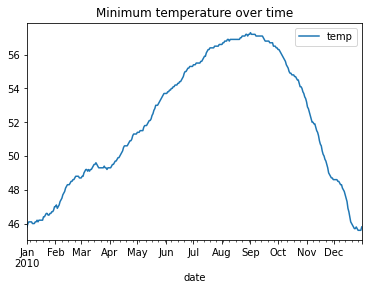

In [9]:
df.resample('D').min().plot(title = 'Minimum temperature over time');

3. Write the code necessary to visualize the maximum temperature over time.

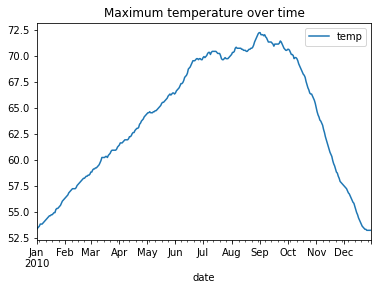

In [10]:
df.resample('D').max().plot(title = 'Maximum temperature over time');

4. Which month is the coldest, on average?

In [35]:
df.resample('M').mean().sort_values('temp').head(1)


,temp
date,
2010-01-31,49.98414


5. Which month has the highest average temperature?

In [34]:
df.resample('M').mean().sort_values('temp').tail(1)

,temp
date,
2010-09-30,62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [42]:
daily_temp = df.temp.resample('D').agg(['min', 'max'])
daily_temp['day_variance'] = daily_temp['max'] - daily_temp['min']
daily_temp

,min,max,day_variance
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [45]:
daily_temp.resample('M').mean().sort_values('day_variance').head(1)

,min,max,day_variance
date,,,
2010-12-31,47.025806,54.951613,7.925806


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [48]:
daily_temp = df.temp.resample('D').agg(['min', 'mean', 'max'])
daily_temp.head()

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8


<AxesSubplot:title={'center':'Temperature over time'}, xlabel='date', ylabel='temperature (°F)'>

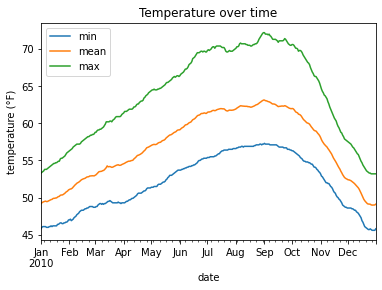

In [52]:
daily_temp.plot(title = 'Temperature over time', ylabel = 'temperature (°F)')

#### Seatte Weather

Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [53]:
df = data.seattle_weather()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [55]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [62]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [64]:
df.groupby(['year', 'month']).precipitation.sum().sort_values().tail()

year  month
2012  3        183.0
      11       210.5
2015  11       212.6
2014  3        240.0
2015  12       284.5
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

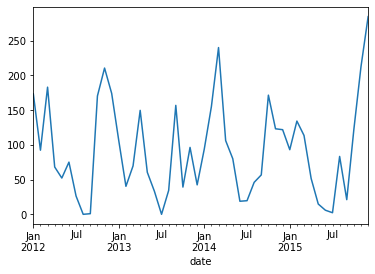

In [90]:
df.set_index('date').resample('M').precipitation.sum().plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

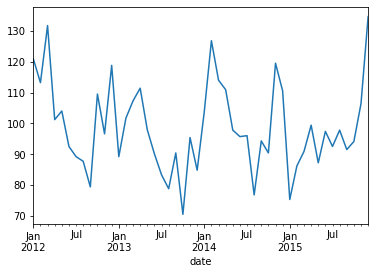

In [81]:
df.set_index('date').resample('M').wind.sum().plot()

4. Which year-month combination is the windiest?

In [91]:
df.groupby(['year', 'month']).wind.sum().sort_values().tail()

year  month
2014  11       119.5
2012  1        120.9
2014  2        126.8
2012  3        131.7
2015  12       134.6
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [94]:
df[df.weather == 'sun'].groupby('year').size()

year
2012    118
2013    205
2014    211
2015    180
dtype: int64

6. In which month does it rain the most?

In [95]:
df.groupby('month').precipitation.sum().sort_values().tail(1)

month
11    642.5
Name: precipitation, dtype: float64

7. Which month has the most number of days with a non-zero amount of precipitation?

In [96]:
df['day_rainy'] = df.precipitation > 0
df.groupby('month').day_rainy.sum().sort_values().tail(1)

month
12    81
Name: day_rainy, dtype: int64

#### Flights

Use the dataset to answer the following questions:

1. Convert any negative delays to 0.

In [97]:
df = data.flights_20k()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [98]:
df.delay.describe()

count    20000.000000
mean         8.103600
std         25.375748
min        -58.000000
25%         -5.000000
50%          0.000000
75%         12.000000
max        509.000000
Name: delay, dtype: float64

In [99]:
df['delay'] = np.where(df['delay'] < 0, 0, df['delay'])
df.delay.describe()

count    20000.000000
mean        11.119450
std         23.527015
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        509.000000
Name: delay, dtype: float64

2. Which hour of the day has the highest average delay?

In [100]:
df.groupby(df.date.dt.hour).delay.mean().sort_values().tail(1)

date
3    302.5
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [101]:
df.groupby(df.date.dt.day_name()).delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [102]:
df.groupby(df.date.dt.month).delay.mean().sort_values()

date
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64